### 이상치 데이터 처리
- 피쳐/특성에 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못 입력된 경우, 자연으로 생성된 데이터
    * 잘못 입력된 데이터 : 입력 시 오타            => 제거 또는 대체
    * 자연 생성 데이터 : 연봉, 키, 몸무게, 나이     => 분리해서 전용 모델 생성 / 식별용 피쳐 추가
- 탐지
    * 시각화 확인
    * 데이터의 분포를 확인 : Z-Score / IQR(Turkey Fences)
- 처리   
    * 삭제 / 대체 / 분리 모델 / 파생변수 추가

(1) 모듈 로딩 및 데이터 준비 <hr>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# 임의의 데이터
dataDF = pd.DataFrame({'num':[1,4,3,2,4,5,-14,2,1,15,2]})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     11 non-null     int64
dtypes: int64(1)
memory usage: 216.0 bytes


(2) 데이터 전처리 <hr>

(2-1) 데이터 확인

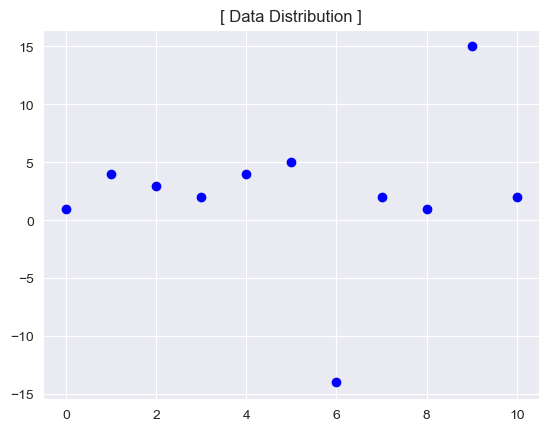

In [46]:
# 시각화로 데이터 확인
plt.plot(dataDF['num'],'bo')
plt.title('[ Data Distribution ]')
plt.show()

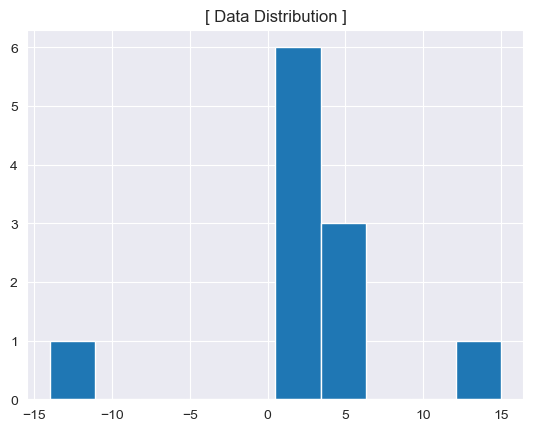

In [47]:
plt.hist(dataDF['num']) # 기본값 : bins = 10
plt.title('[ Data Distribution ]')
plt.show()

(2-2) 불필요 데이터 체크 => 결측치, 이상치

In [48]:
# 결측치
dataDF.isnull().sum()

num    0
dtype: int64

In [49]:
# 이상치 탐지 : 방법 1 - 평균과 편차를 이용한 탐지 : Z-score
# Z-score = (데이터 - 평균)/표준편차
mean_val = dataDF['num'].mean()
std_val = dataDF['num'].std()

z_data = (dataDF - mean_val) / std_val  # 정상값은 +- 1.0 사이에 다 존재

In [62]:
# 양끝단 제거를 위한 기준값 => 1.0
hold = 1.0
mask = z_data.abs() > hold

,num
0,-0.190966
1,0.259167
2,0.109123
3,-0.040921
4,0.259167
5,0.409212
6,-2.441631
7,-0.040921
8,-0.190966
9,1.909655


In [58]:
z_data[~mask].dropna(inplace=True)
dataDF[~mask].dropna(inplace=True)
z_data,dataDF

(         num
 0  -0.190966
 1   0.259167
 2   0.109123
 3  -0.040921
 4   0.259167
 5   0.409212
 6  -2.441631
 7  -0.040921
 8  -0.190966
 9   1.909655
 10 -0.040921,
     num
 0     1
 1     4
 2     3
 3     2
 4     4
 5     5
 6   -14
 7     2
 8     1
 9    15
 10    2)

In [65]:
# 이상치 탐지 : 방법 2 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지
threshold = 1.5
q1 = dataDF.quantile(0.25)
q3 = dataDF.quantile(0.75)
iqr = q3 - q1

# 이상치로 판단할 기준되는 값
lower = q1 - threshold * iqr
upper = q3 + threshold * iqr

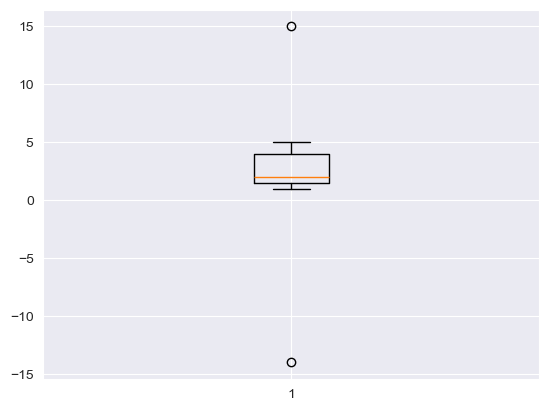

In [76]:
# 시각화
bp_obj = plt.boxplot(dataDF['num']) # boxplot에 반환값 존재
bp_obj.keys()   # ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']

plt.show()

In [88]:
# [q1, min], [q3, max]
bp_obj['whiskers'][0].get_ydata(),bp_obj['whiskers'][1].get_ydata()

(array([1.5, 1. ]), array([4., 5.]))

In [85]:
# medians : 중앙값
bp_obj['medians'][0].get_ydata()

array([2., 2.])

In [87]:
bp_obj['boxes'][0].get_ydata()

array([1.5, 1.5, 4. , 4. , 1.5])

In [86]:
# fliers : 이상치 값
bp_obj['fliers'][0].get_ydata()

array([-14,  15], dtype=int64)